# Redes Bayesianas
---

## Formula de Bayes

$$𝑃(𝐴/𝐵) = \dfrac{𝑃(𝐵/𝐴) 𝑃(𝐴)}{𝑃(𝐵)}$$

* Si se quiere calcular la probabilidad de un evento dado otro, se puede hacer en base a esta fórmula

## Comparando

* **Estimación de máxima verosimilitud**: mirar los datos
* **Estimación bayesiana**: incorpora conocimiento o información previa

## Redes Bayesianas

* Son estructuras gráficas-simbólicas para representar relaciones probabilísticas entre variables
* Permiten definir modelos para dianóstico o predicción
* Nodos: las variables
* Aristas: dependencias
* Grafo DAG (Directed Acyclic Graph)
* Usadas para clasificación

```mermaid
graph TD
    A1(A1) --> C(C)
    A2(A2) --> C
    A3(A3) --> C
```

* P(A1=1, A2=1, A3=1, C=1)
* Tengo $2^4$ combinaciones (parámetros)

* Distribución conjunta de probabilidades para las variables tal que se verifica la **Condición de Markov**: 
* ***Cada nodo es independiente de sus descendientes (nd) dado el conjunto de sus padres***

## Ejemplo de BN

```mermaid
graph TD
    H(H: Tiene historia de fumador?) --> B(B: Tiene bronquitis?)
    H --> L(L: Tiene cancer de pulmón?)
    B --> F(F: Tiene fatiga pulmonar?)
    L --> F
    L --> C(C: RX de torax positivo?)
```

* P(H=1) = 0.2
* P(B=1/H=1) = 0.25
* P(B=1/H=0) = 0.05
* ...

* Función de probabilidad conjunta:
$$P(H, B, L, F, C) = P(H) P(B/H) P(L/H) P(C/L) P(F/B,L)$$

## Clasificación con Redes Bayesianas

```mermaid
graph TD
    C(C) --> A1(A1)
    C --> A2(A2)
    C --> A3(..)
    C --> An(An)
```

* C: variable de clasificación
* $A_i$: atributos

* **¿Cómo predecir C a partir de los atributos?**
  * Buscar el valor de C que maximice las probabilidades a posteriori $P(A_1, A_2,..., A_n / C) * P(C)$

## Clasificador Naive Bayes

```mermaid
graph TD
    C(C) --> A1(A1)
    C --> A2(A2)
    C --> A3(..)
    C --> An(An)
```

$$P(A_1,... | C) = \prod_{k=1}^{n} P(a_k / C)$$

## Ejemplo

| nom        | paricion? | vuela? | vive en agua? | tiene piernas? | clase       |
| --         | --        | --     | --            | --             | --          |
| human      | si        | no     | no            | si             | mamifero    |
| python     | no        | no     | no            | no             | no-mamifero |
| salmon     | no        | no     | si            | no             | no-mamifero |
| whale      | si        | no     | si            | no             | mamifero    |
| frog       | no        | no     | a veces       | si             | no-mamifero |
| komodo     | no        | no     | no            | si             | no-mamifero |
| bat        | si        | si     | no            | si             | mamifero    |
| pigeon     | no        | si     | no            | si             | no-mamifero |
| cat        | si        | no     | no            | si             | mamifero    |
| leopard    | si        | no     | si            | no             | no-mamifero |
| turtle     | no        | no     | a veces       | si             | no-mamifero |
| penguin    | no        | no     | a veces       | si             | no-mamifero |
| porcupine  | si        | no     | no            | si             | mamifero    |
| eel        | no        | no     | si            | no             | no-mamifero |
| salamander | no        | no     | a veces       | si             | no-mamifero |
| gila       | no        | no     | no            | si             | no-mamifero |
| platypus   | no        | no     | no            | si             | mamifero    |
| owl        | no        | si     | no            | si             | no-mamifero |
| dolphin    | si        | no     | si            | no             | mamifero    |
| eagle      | no        | si     | no            | si             | no-mamifero |


| caso   | paricion? | vuela? | vive en agua? | tiene piernas? | clase       |
| --     | --        | --     | --            | --             | --          |
|        | si        | no     | si            | no             | ????????    |

* P(Atrib Obs/Mamifero) = 6/7 * 6/7 * 2/7 * 2/7 = 0.06 
* P(Atrib Obs/No Mamifero) = 1/13 * 10/13 * 3/13 * 4/13 = 0.0042
* P(Atrib Obs/Mamifero) P(Mamifero) = 0.06 + 7/20 = **0.021**
* P(Atrib Obs/No Mamifero) P(No Mamifero) = 0.0042 * 13/20 = **0.0027**

* P(Atrib Obs/Mamifero) P(Mamifero) > P(Atrib Obs/No Mamifero) P(No Mamifero) => Se lo clasifica como **mamifero**

¿Cómo sería clasificar con **Máxima Verosimilitud**? Veo solo los valores **0.06** y **0.0042**

**Bayesiano** mira las condiciones de los atributos observados y pondera por la representatividad de las clases sobre las que quiero clasificar en la población

* ¿Que pasaría si en la tabla se quitaría el murcielago (bat)?
* P(Atrib Obs/Mamifero) = 5/6 * 0/6 * 1/6 * 1/6 = **0**
* Haciendo los otros cálculos... se lo clasifica como NO MAMIFERO
* Se sugiere usar Laplace (sumarle 1)

In [79]:
library(ggplot2)
library(readxl)
library(caret)
library(e1071)
library(dplyr)
library(gridExtra)
library(ROCR)
library(klaR)

In [37]:
# Lineas para limpieza
rm(list=ls())

In [38]:
setwd("/Users/ppando/Materias/cs-datos/especializacion/aprendizaje-automatico/bd")

## Ejemplo Hipoteca

In [39]:
datos <- read_excel("hipoteca25b.xlsx")
str(datos)

tibble [2,380 × 9] (S3: tbl_df/tbl/data.frame)
 $ id       : num [1:2380] 1 2 3 4 5 6 7 8 9 10 ...
 $ gasto    : num [1:2380] 0.221 0.265 0.372 0.32 0.36 ...
 $ rat      : num [1:2380] 0.8 0.922 0.92 0.86 0.6 ...
 $ rat.desem: num [1:2380] 3.9 3.2 3.2 4.3 3.2 ...
 $ malhist  : chr [1:2380] "no" "no" "no" "no" ...
 $ auton    : chr [1:2380] "no" "no" "no" "no" ...
 $ soltero  : chr [1:2380] "no" "yes" "no" "no" ...
 $ denegado : num [1:2380] 0 0 0 0 0 0 0 0 1 0 ...
 $ malhist3 : num [1:2380] 2 2 2 2 2 2 2 2 2 1 ...


In [40]:
# Se elimina id
datos <- datos[, -1]

In [41]:
# Se transforma las variables cualitativas a factor
datos$denegado <- as.factor(datos$denegado)
datos$soltero <- as.factor(datos$soltero)
datos$auton <- as.factor(datos$auton)
datos$malhist <- as.factor(datos$malhist)
datos$malhist3 <- as.factor(datos$malhist3)

In [ ]:
# Se muestra el summary
summary(datos)

In [42]:
# Se detectan datos muy atípicos en el préstamo solicitado respecto al valor del bien 
# saco los casos con atípicos (igual al análisis con logística)
datos2 <- datos[datos$rat < 1.5,]
summary(datos2)

     gasto             rat           rat.desem     malhist    auton     
 Min.   :0.0000   Min.   :0.0200   Min.   :0.000   no :2182   no :2085  
 1st Qu.:0.2800   1st Qu.:0.6513   1st Qu.:3.100   yes: 172   yes: 269  
 Median :0.3300   Median :0.7778   Median :3.200                        
 Mean   :0.3297   Mean   :0.7324   Mean   :3.014                        
 3rd Qu.:0.3700   3rd Qu.:0.8639   3rd Qu.:3.600                        
 Max.   :3.0000   Max.   :1.2000   Max.   :8.900                        
 soltero    denegado malhist3
 no :1432   0:2082   1: 305  
 yes: 922   1: 272   2:1877  
                     3: 172  
                             
                             
                             

In [43]:
# Se ajustan modelos en conj de entrenamiento y se lo evalua en conj de testing
set.seed(123)
indices <- createDataPartition(datos2$denegado, p = 0.7, list = FALSE)
dataTrain <- datos2[indices, ] # 70 
dataTest <- datos2[-indices, ] # 30

In [44]:
# Se ajusta Naive Bayes
# OJO! no permite interacciones
# admite variables categoricas y/o numéricas
# las categoricas las toma como factores, las numericas como normales

In [48]:
mod1 <- naiveBayes(denegado ~ malhist + auton + soltero, data = dataTrain,laplace = 0) #laplace = 1 para que lo habilite
mod1


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.8841722 0.1158278 

Conditional probabilities:
   malhist
Y           no        yes
  0 0.95061728 0.04938272
  1 0.73298429 0.26701571

   auton
Y          no       yes
  0 0.8923182 0.1076818
  1 0.8586387 0.1413613

   soltero
Y          no       yes
  0 0.6200274 0.3799726
  1 0.4764398 0.5235602


```mermaid
graph TD
    C(Denegado) --> A1(malhist)
    C --> A2(auton)
    C --> A3(soltero)
```

* Variable objetivo (Y): si deniegan o no el préstamo
* Variables dicotómicas: malhist, auton, soltero
$$P(Y=1, M=yes, A=yes, S=yes)$$
$$P(M=yes/Y=1)P(A=yes/Y=1)P(S=yes/Y=1)P(Y=1)$$
$$0.267 * 0.141 * 0.523 * 0.115$$

In [49]:
# Se hace la predicción en un caso:
caso <- dataTest[1,] # el caso 1 del conjunto de Test
caso

gasto,rat,rat.desem,malhist,auton,soltero,denegado,malhist3
<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
0.372,0.920398,3.2,no,no,no,0,2


In [50]:
# Probabilidades predichas
predict(object = mod1, newdata = caso, type = "raw")

0,1
0.9305024,0.06949765


* Son las probabilidades cuando denegado es 0 y es 1
* En este caso se denega el préstamo

In [51]:
# Clase predicha
predict(object = mod1, newdata = caso, type = "class")

[1] 0
Levels: 0 1

$$P(Y=1, M=no, A=no, S=no)$$
$$P(M=no/Y=1)P(A=no/Y=1)P(S=no/Y=1)P(Y=1) / Cte$$
$$0.732 * 0.858 * 0.476 * 0.115 / Cte$$
$$0.06949765$$

In [52]:
# Se evalua la predicción en test:
# para ver las probabilidades predichas para cada caso:
proba.1 <- predict(object = mod1, newdata = dataTest, type = "raw")
head(proba.1)

0,1
0.9305024,0.06949765
0.8818906,0.11810944
0.9305024,0.06949765
0.9305024,0.06949765
0.9305024,0.06949765
0.9305024,0.06949765


In [53]:
# para ver la clase predicha (toma las probabilidades mayores)
predi.1 <- predict(object = mod1, newdata = dataTest, type = "class")
head(predi.1)

[1] 0 0 0 0 0 0
Levels: 0 1

In [54]:
confusion.1 <- table(predi.1, dataTest$denegado, dnn = c("predicho","observado"))
confusionMatrix(confusion.1,positive = "1")

Confusion Matrix and Statistics

        observado
predicho   0   1
       0 623  80
       1   1   1
                                          
               Accuracy : 0.8851          
                 95% CI : (0.8592, 0.9077)
    No Information Rate : 0.8851          
    P-Value [Acc > NIR] : 0.5296          
                                          
                  Kappa : 0.0187          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.012346        
            Specificity : 0.998397        
         Pos Pred Value : 0.500000        
         Neg Pred Value : 0.886202        
             Prevalence : 0.114894        
         Detection Rate : 0.001418        
   Detection Prevalence : 0.002837        
      Balanced Accuracy : 0.505372        
                                          
       'Positive' Class : 1               
                                      

* Predice muy bien los casos 0
* Predice muy mal los casos 1
* Accuracy es alto
* Muy mala la sensitividad, se puede mejorar modificando el umbral que por default fue de 0.5

In [55]:
summary(dataTest)

     gasto             rat           rat.desem     malhist   auton    
 Min.   :0.0400   Min.   :0.0200   Min.   :0.000   no :656   no :620  
 1st Qu.:0.2800   1st Qu.:0.6438   1st Qu.:3.100   yes: 49   yes: 85  
 Median :0.3359   Median :0.7783   Median :3.200                      
 Mean   :0.3271   Mean   :0.7320   Mean   :3.012                      
 3rd Qu.:0.3714   3rd Qu.:0.8678   3rd Qu.:3.600                      
 Max.   :0.9500   Max.   :1.2000   Max.   :8.900                      
 soltero   denegado malhist3
 no :437   0:624    1: 95   
 yes:268   1: 81    2:561   
                    3: 49   
                            
                            
                            

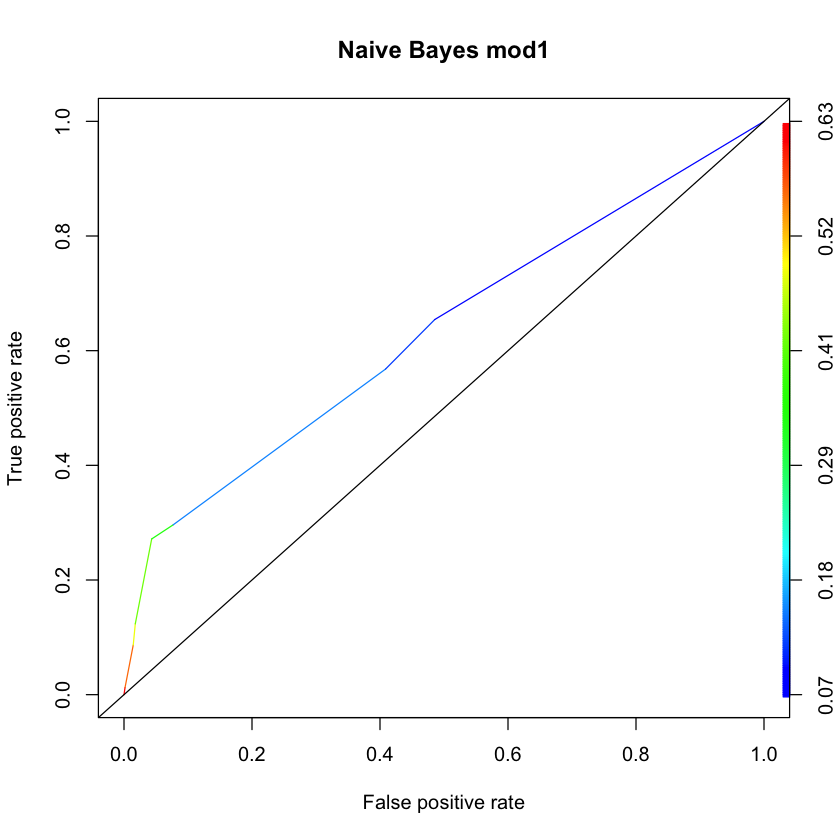

In [56]:
#CURVA ROC Y AUC 
prediccion1 <- prediction(proba.1[,2], dataTest$denegado)
roc_mod1 <- performance(prediccion1, measure = "tpr", x.measure = "fpr")
plot(roc_mod1, main = "Naive Bayes mod1", colorize = T)
abline(a = 0, b = 1)

* Se ven segmentos, porque tengo como predictoras variables categóricas

In [57]:
AUC.mod1 <- performance(prediccion1, "auc")
#para que me de AUC:
AUC.mod1@y.values

[[1]]
[1] 0.6314597

In [58]:
## MODELO CON TODAS LAS NUMERICAS ##
mod2 <- naiveBayes(denegado ~gasto+rat+rat.desem, data = dataTrain,laplace=0) #laplace=1 para que lo habilite
mod2


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.8841722 0.1158278 

Conditional probabilities:
   gasto
Y        [,1]       [,2]
  0 0.3234586 0.07820652
  1 0.3874634 0.22863543

   rat
Y        [,1]      [,2]
  0 0.7240997 0.1695045
  1 0.7973397 0.1477602

   rat.desem
Y       [,1]     [,2]
  0 3.019781 1.263817
  1 2.980733 1.296230


*  Muestra los parámetros: media y desvio de la distribución normal y luego se usa la función dnorm (densidad)

In [60]:
# hacer matriz de confusion y AUC:
proba.2 <- predict(object = mod2, newdata = dataTest, type = "raw")
head(proba.2)

0,1
0.9229696,0.07703042
0.9529373,0.04706269
0.9396309,0.06036913
0.9800392,0.01996077
0.9503714,0.04962858
0.9119001,0.08809993


In [63]:
# si quiero la clase predicha:
predi.2 <- predict(object = mod2, newdata=dataTest, type = "class")
head(predi.2)

[1] 0 0 0 0 0 0
Levels: 0 1

In [64]:
confusion.2 <- table(predi.2, dataTest$denegado, dnn = c("predicho","observado"))
confusionMatrix(confusion.2,positive = "1")

Confusion Matrix and Statistics

        observado
predicho   0   1
       0 615  76
       1   9   5
                                          
               Accuracy : 0.8794          
                 95% CI : (0.8531, 0.9025)
    No Information Rate : 0.8851          
    P-Value [Acc > NIR] : 0.7062          
                                          
                  Kappa : 0.0739          
                                          
 Mcnemar's Test P-Value : 8.144e-13       
                                          
            Sensitivity : 0.061728        
            Specificity : 0.985577        
         Pos Pred Value : 0.357143        
         Neg Pred Value : 0.890014        
             Prevalence : 0.114894        
         Detection Rate : 0.007092        
   Detection Prevalence : 0.019858        
      Balanced Accuracy : 0.523653        
                                          
       'Positive' Class : 1               
                                      

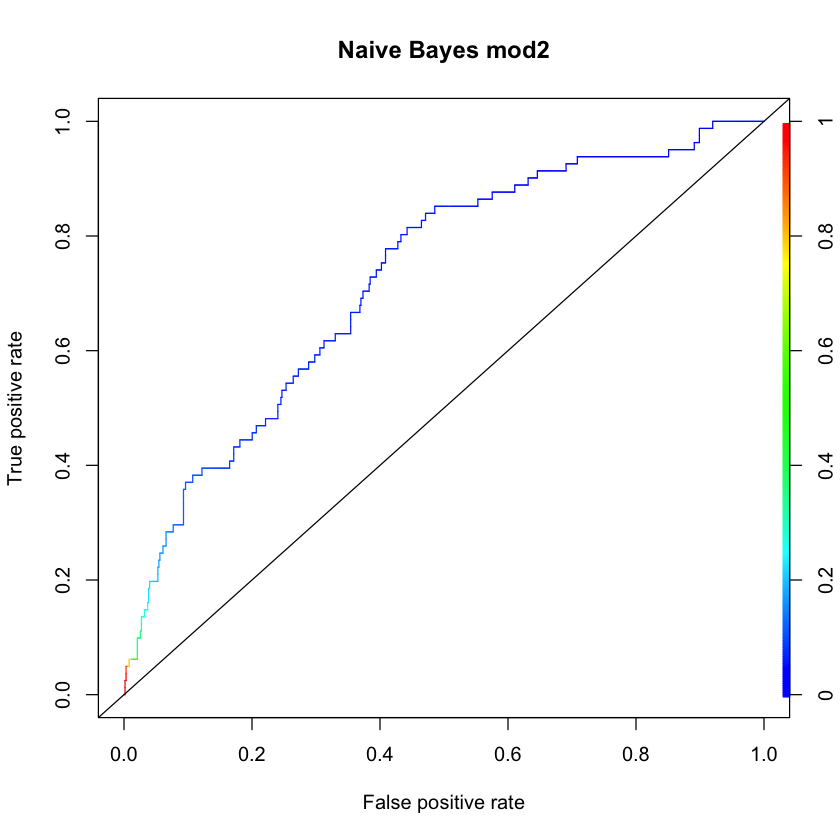

In [65]:
prediccion2<-prediction(proba.2[,2],dataTest$denegado)
roc_mod2 <- performance(prediccion2, measure = "tpr", x.measure = "fpr")
plot(roc_mod2, main = "Naive Bayes mod2", colorize = T)
abline(a = 0, b = 1)

* Se observa curva escalonada

In [66]:
AUC.mod2 <- performance(prediccion2, "auc")
#para que me de AUC:
AUC.mod2@y.values

[[1]]
[1] 0.7235478

* Se observa que este modelo **mod2** tiene **0.72** de capacidad predictiva (área bajo la curva ROC) respecto del modelo **mod1** que tiene **0.63**. Sirve para comparar modelos de clasificación. Tambien debo mirar la tabla de confusión. Con ambas elegir el modelo

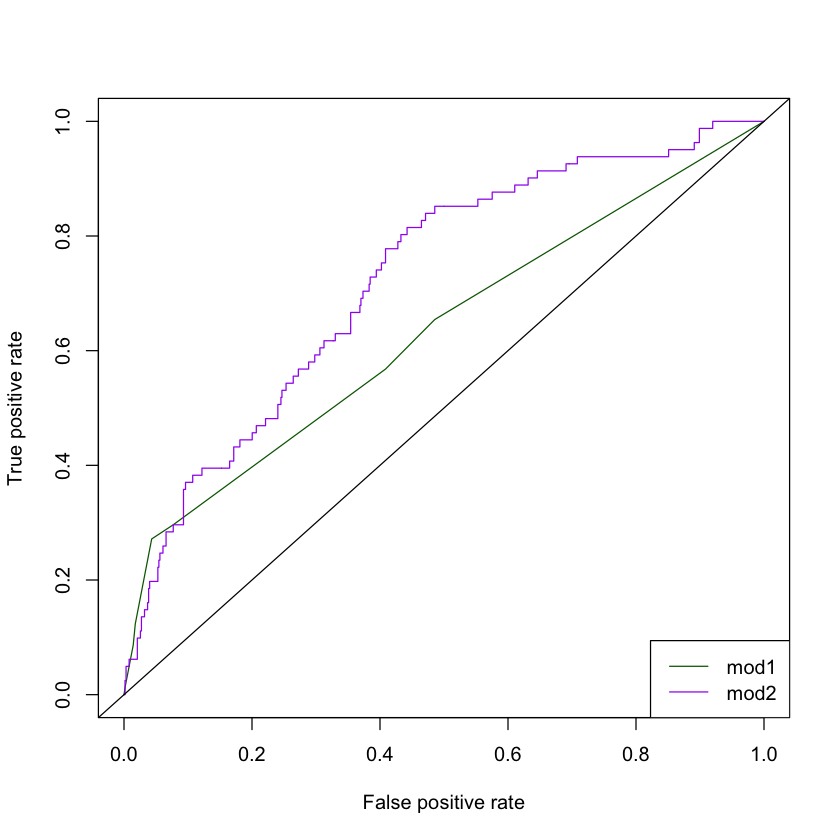

In [67]:
## Se grafican ambas curvas:
plot(roc_mod1, col = "darkgreen")
plot(roc_mod2, col = "purple", add = TRUE)
legend("bottomright", legend = c("mod1", "mod2"), col = c("darkgreen", "purple"), lty = 1)
abline(a = 0, b = 1)

## Ejemplo Iris (Clasificación Multiclase)

In [70]:
data(iris)
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [71]:
# Se selecciona una submuestra de una cantidad de casos
set.seed(13579)
iris.indices <- sample(1:nrow(iris), size = 105)
iris.train <- iris[iris.indices,]
iris.test <- iris[-iris.indices,]

In [72]:
model <- naiveBayes(Species ~ ., data = iris.train)
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    setosa versicolor  virginica 
 0.3142857  0.3428571  0.3428571 

Conditional probabilities:
            Sepal.Length
Y                [,1]      [,2]
  setosa     4.978788 0.3603450
  versicolor 5.891667 0.5447804
  virginica  6.563889 0.6941193

            Sepal.Width
Y                [,1]      [,2]
  setosa     3.393939 0.3976017
  versicolor 2.777778 0.2899370
  virginica  2.941667 0.3358358

            Petal.Length
Y                [,1]      [,2]
  setosa     1.481818 0.1810638
  versicolor 4.208333 0.4964877
  virginica  5.513889 0.5836598

            Petal.Width
Y                 [,1]      [,2]
  setosa     0.2454545 0.1092329
  versicolor 1.3138889 0.2044544
  virginica  2.0111111 0.2538591


In [74]:
predi.iris <- predict(object = model, newdata = iris.test, type = "class")
confusion.iris <- table(predi.iris,iris.test$Species)
confusion.iris

            
predi.iris   setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         13         1
  virginica       0          1        13

In [75]:
# Se mejora el modelo 
# implementación con caret para ajustar el modelo con cross validation en train
x <- iris.train[, -5]
y <- iris.train$Species

In [82]:
# modelo NB en el conjunto de entrenamiento
nb.iris <- train(              
  x = x,
  y = y,
  method = "nb",
  trControl = trainControl(method = "cv", number = 10) # set up 10-fold CV
)
names(nb.iris)
nb.iris$finalModel$tables

[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "ptype"        "resample"    
[16] "resampledCM"  "perfNames"    "maximize"     "yLimits"      "times"       
[21] "levels"

setosa,4.978788,0.3603450
versicolor,5.891667,0.5447804
virginica,6.563889,0.6941193
setosa,3.393939,0.3976017
versicolor,2.777778,0.2899370
virginica,2.941667,0.3358358
setosa,1.481818,0.1810638
versicolor,4.208333,0.4964877
virginica,5.513889,0.5836598
setosa,0.2454545,0.1092329
versicolor,1.3138889,0.2044544


In [81]:
confusionMatrix(nb.iris) #da porcentajes de clasificacion en train

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   setosa versicolor virginica
  setosa       31.4        0.0       0.0
  versicolor    0.0       31.4       2.9
  virginica     0.0        2.9      31.4
                            
 Accuracy (average) : 0.9429


In [83]:
#ahora veamos prediccion en test:
#Esta función predict aplicada a un modelo ajustado por la función train no es el mismo de antes
#admite type="raw" para sacar las clases predichas y "prob" para sacar las probabilidades
predi.iris2 <- predict(nb.iris, newdata = iris.test,type="raw")

In [84]:
#puedo ir directamente a confusionMatrix si predije las clases
confusionMatrix(predi.iris2, iris.test$Species) 
#ver en la salida que las métricas usan "uno contra todos"

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         17          0         0
  versicolor      0         13         1
  virginica       0          1        13

Overall Statistics
                                          
               Accuracy : 0.9556          
                 95% CI : (0.8485, 0.9946)
    No Information Rate : 0.3778          
    P-Value [Acc > NIR] : 2.61e-16        
                                          
                  Kappa : 0.933           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9286           0.9286
Specificity                 1.0000            0.9677           0.9677
Pos Pred Value              1.0000            0.9286           0.9286
Neg Pred Value              1.0000            0.9677           0.9677
P

In [86]:
## OBS: para hacer la curva ROC necesito 2 clases, y acá hay 3!
# podemos convertir en un problema binario:
# Convertir la variable Species en un problema binario (Setosa vs. No Setosa)
#esto crea una variable nueva indicadora de "setosa". 
iris$Species.setosa <- ifelse(iris$Species == "setosa", 1, 0)
# Luego ajusto modelos con esta y ahí ROC... lo mismo que antes!

In [ ]:
########################################
####### REDES BAYESIANAS GENERALES #####

library(bnlearn)
data(asia)
summary(asia)
# construimos la RB sobre un conjunto de entrenamiento
set.seed(123)
indices <- sample(1:nrow(asia), nrow(asia) * 0.70, replace=FALSE)
asiaTrain<-asia[indices,]
asiaTest<-asia[-indices,]


### ESTRUCTURA PREFIJADA ####
modelA1 = empty.graph(names(asiaTrain))
modelstring(modelA1) = "[A][S][B][T|A][L|S][D|B:E][E|T:L][X|E]"
plot(modelA1)

### APRENDIENDO LA ESTRUCTURA con Hill Climbing:
model_hc<-hc(asiaTrain,score="aic")
model_hc
plot(model_hc)
modelstring(model_hc)

#comparamos estructuras ajustadas
#compare(modelA1,modelA2)
par(mfrow = c(1,2))
plot(modelA1, main = "Estructura dada", highlight = c("A", "B"))
plot(model_hc, main = "Hill-Climbing", highlight = c("A", "B"))

## APRENDER PARAMETROS
#aprendemos los parámetros con datos discretos(por ML)
fitA1 = bn.fit(modelA1, asiaTrain,method = "mle")
fitA1
bn.fit.barchart(fitA1$D) 

# aprendemos parámetros con datos discretos con estimación Bayesiana
fitB1 = bn.fit(modelA1, asiaTrain, method = "bayes")
fitB1

fit.hc = bn.fit(model_hc, asiaTrain, method = "bayes") # el default es mle
fit.hc


## PREDICCION ##
# queremos predecir si la persona tiene cancer de pulmón o tuberculosis a partir de los datos
# veamos la prediccion con el modelo fitA1
pred.A1a = predict(fitA1, node = "T", data = asiaTest, method = "parents") #prediccion exacta, no usa el DAG
head(pred.A1a) # muestra la clase predicha
#table(pred.A1a,asiaTest$T)

pred.A1b = predict(fitA1, node = "T", data = asiaTest, prob = TRUE) #predigo con ML
attr(pred.A1b, "prob")[, 1:5] #muestra las probabilidades predichas
table(pred.A1b,asiaTest$T)

pred.A1 = predict(fitA1, node = "T", data = asiaTest, method = "bayes-lw") # prediccion con Bayes con algoritmo de Monte Carlo
confusion.A1 <-  table(pred.A1,asiaTest$T)

library(caret)
confusionMatrix(confusion.A1,positive = "yes") # da mucho mejor!

# veamos la prediccion con el modelo hc
pred.hcb = predict(fit.hc, node = "L", data = asiaTest, prob = TRUE)
table(pred.hcb,asiaTest$L)
pred.hc = predict(fit.hc, node = "L", data = asiaTest, method = "bayes-lw")
confusion.hc <-  table(pred.hc,asiaTest$L)

library(caret)
confusionMatrix(confusion.hc,positive = "yes") # mucho mejor con esta estructura!